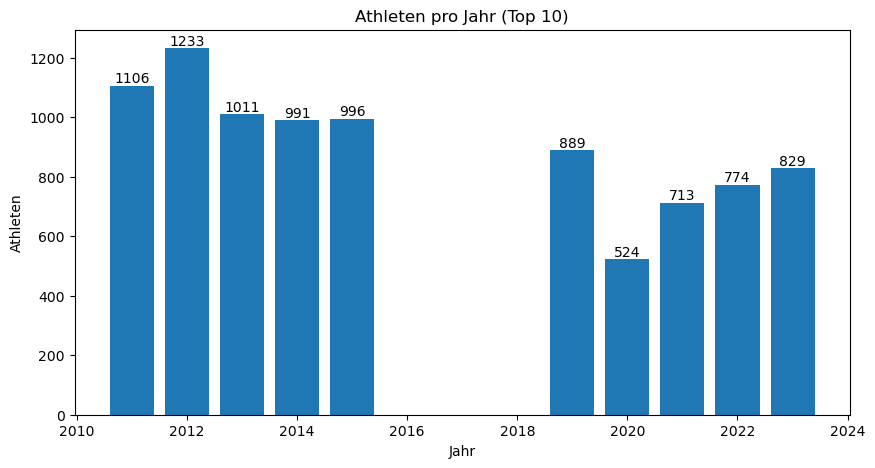

In [302]:
import pandas as pd
import os 
import matplotlib.pyplot as plt

years = [int(file.split('.')[0])
         for file in os.listdir('data') if file.split('.')[0].isnumeric()]

min_year = min(years)
max_year = max(years)
missing_years = [year for year in range(min_year, max_year + 1) if year not in years]
data_range = 'Im Zeitraum von ' + str(min_year) + ' bis ' + str(max_year) + (' ohne ' + str(missing_years)[1:-1] if len(missing_years) > 0 else '')

data = pd.concat([pd.read_csv(f'data/{year}.csv') for year in years])
data = data[data['place'] <= 10]
data['points'] = 11 - data['place']
data['date'] = pd.to_datetime(data['date'], format='%d.%m.%Y')
data['age'] = data['date'].dt.year - data['birthyear']

agg_data = data.groupby(data['date'].dt.year)['athleteId'].nunique()

fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(agg_data.index, agg_data.values)
ax.set_xlabel('Jahr')
ax.set_ylabel('Athleten')
ax.set_title('Athleten pro Jahr (Top 10)')
for i, v in enumerate(agg_data.values):
    ax.text(agg_data.index[i], v, str(v), ha='center', va='bottom')
plt.show()




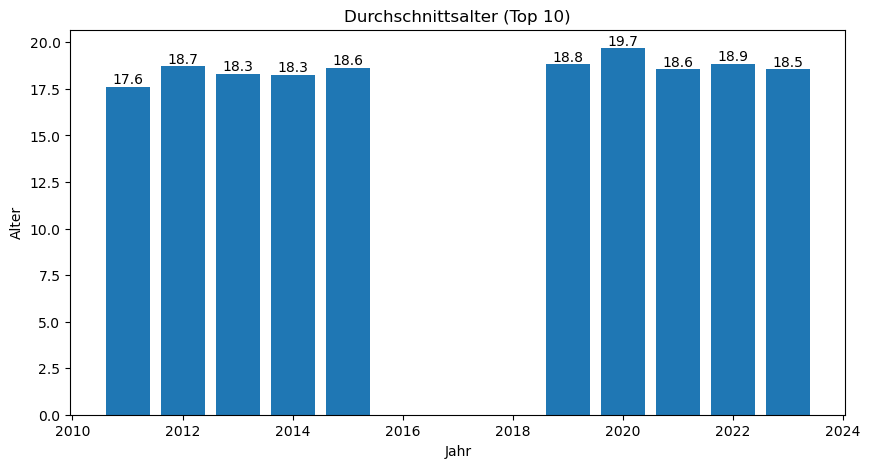

In [303]:
average_age = data[data['birthyear'] > 0]
average_age = average_age.groupby(average_age['date'].dt.year)['age'].mean()
fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(average_age.index, average_age.values)
ax.set_xlabel('Jahr')
ax.set_ylabel('Alter')
ax.set_title('Durchschnittsalter (Top 10)')
for i, v in enumerate(average_age.values):
    ax.text(average_age.index[i], v, str(round(v, 1)), ha='center', va='bottom')
plt.show()

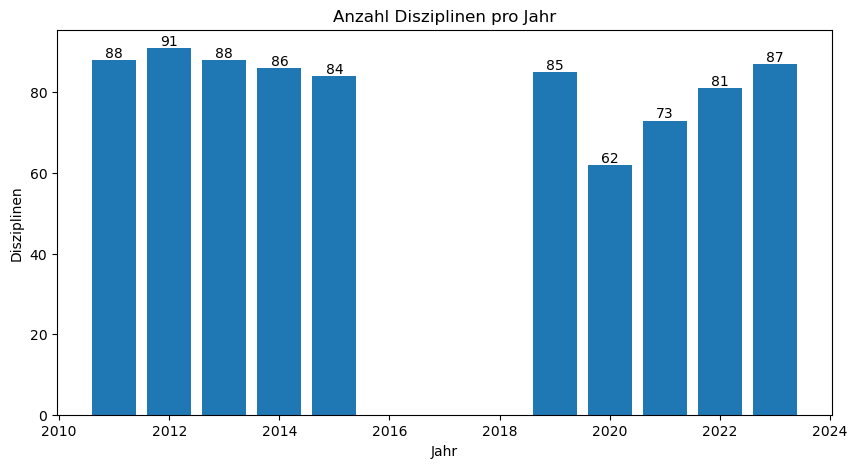

In [304]:
# amount of available disciplines per year
disciplines = data.groupby(data['date'].dt.year)['discipline'].nunique()
fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(disciplines.index, disciplines.values)
ax.set_xlabel('Jahr')
ax.set_ylabel('Disziplinen')
ax.set_title('Anzahl Disziplinen pro Jahr')
for i, v in enumerate(disciplines.values):
    ax.text(disciplines.index[i], v, str(v), ha='center', va='bottom')
plt.show()


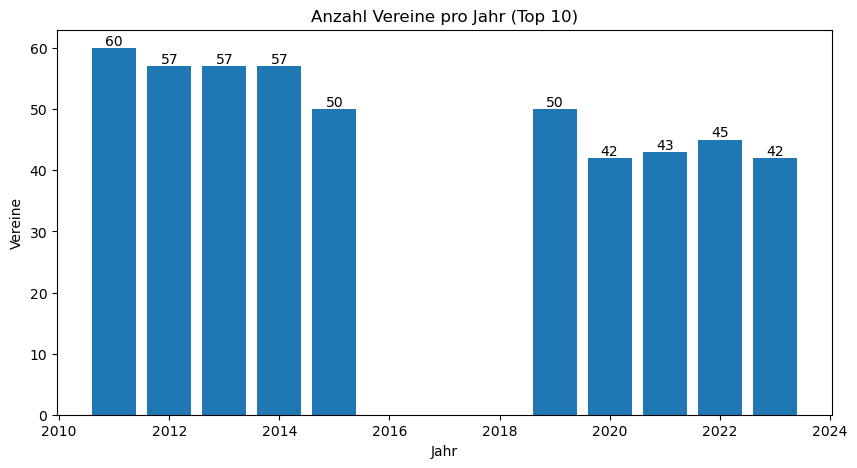

In [305]:
# amount of clubs per year
clubs = data.groupby(data['date'].dt.year)['club'].nunique()
fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(clubs.index, clubs.values)
ax.set_xlabel('Jahr')
ax.set_ylabel('Vereine')
ax.set_title('Anzahl Vereine pro Jahr (Top 10)')
for i, v in enumerate(clubs.values):
    ax.text(clubs.index[i], v, str(v), ha='center', va='bottom')
plt.show()

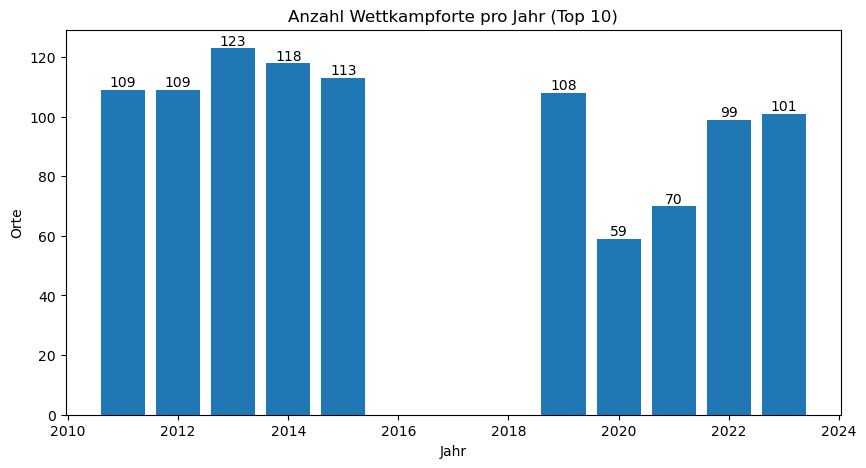

In [306]:
# amount of locations per year
locations = data.groupby(data['date'].dt.year)['location'].nunique()
fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(locations.index, locations.values)
ax.set_xlabel('Jahr')
ax.set_ylabel('Orte')
ax.set_title('Anzahl Wettkampforte pro Jahr (Top 10)')
for i, v in enumerate(locations.values):
    ax.text(locations.index[i], v, str(v), ha='center', va='bottom')
plt.show()

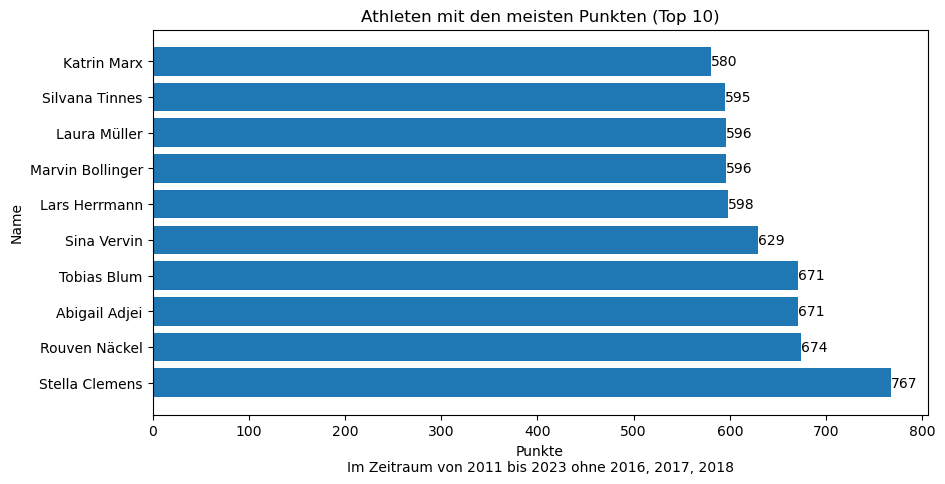

In [307]:
top_athletes = data.groupby(['athleteId', 'firstname', 'lastname'])['points'].sum()
top_athletes = top_athletes.sort_values(ascending=False)[:10]
top_athletes = top_athletes.reset_index()
top_athletes['name'] = top_athletes['firstname'] + ' ' + top_athletes['lastname']
top_athletes = top_athletes.drop(['firstname', 'lastname', 'athleteId'], axis=1)
fig, ax = plt.subplots(figsize=(10, 5))
ax.barh(top_athletes['name'], top_athletes['points'])
ax.set_xlabel('Punkte' + '\n' + data_range)
ax.set_ylabel('Name')
ax.set_title('Athleten mit den meisten Punkten (Top 10)')
for i, v in enumerate(top_athletes['points']):
    ax.text(v, i, str(v), ha='left', va='center')
plt.show()



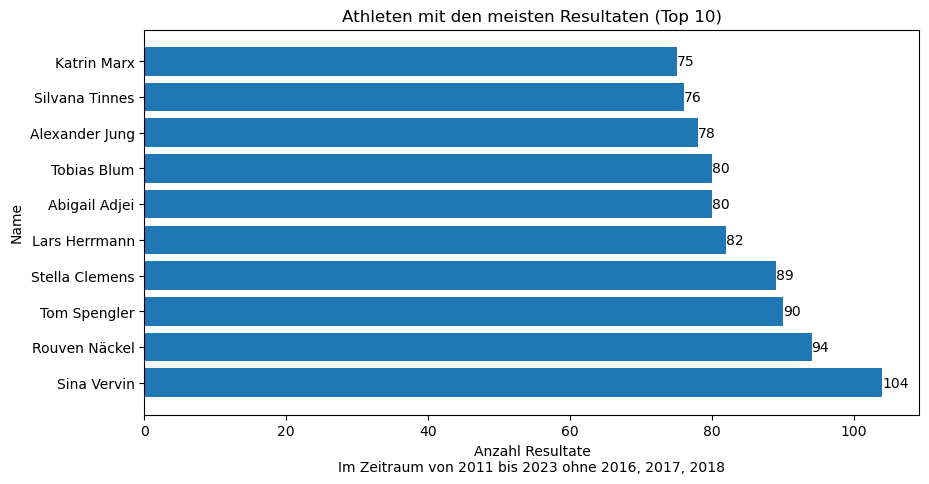

In [308]:
top_athletes = data.groupby(['athleteId', 'firstname', 'lastname'])['points'].count()
top_athletes = top_athletes.sort_values(ascending=False)[:10]
top_athletes = top_athletes.reset_index()
top_athletes['name'] = top_athletes['firstname'] + ' ' + top_athletes['lastname']
top_athletes = top_athletes.drop(['firstname', 'lastname', 'athleteId'], axis=1)
fig, ax = plt.subplots(figsize=(10, 5))
ax.barh(top_athletes['name'], top_athletes['points'])
ax.set_xlabel('Anzahl Resultate\n' + data_range)
ax.set_ylabel('Name')
ax.set_title('Athleten mit den meisten Resultaten (Top 10)')
for i, v in enumerate(top_athletes['points']):
    ax.text(v, i, str(v), ha='left', va='center')
plt.show()

